# MadMiner debugging

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline

from madminer.goldmine import GoldMine
from madminer.tools.plots import plot_2d_morphing_basis

from delphesprocessor.delphesprocessor import DelphesProcessor

from madminer.refinery import combine_and_shuffle
from madminer.refinery import Refinery
from madminer.refinery import constant_benchmark_theta, multiple_benchmark_thetas
from madminer.refinery import constant_morphing_theta, multiple_morphing_thetas, random_morphing_thetas

from forge.forge import Forge

## Debug refinery

In [2]:
refinery = Refinery('data/madminer_example_shuffled.h5', debug=True)

19:27  
19:27  ------------------------------------------------------------
19:27  |                                                          |
19:27  |  MadMiner                                                |
19:27  |                                                          |
19:27  |  Version from July 31, 2018                              |
19:27  |                                                          |
19:27  |           Johann Brehmer, Kyle Cranmer, and Felix Kling  |
19:27  |                                                          |
19:27  ------------------------------------------------------------
19:27  
19:27  Loading data from data/madminer_example_shuffled.h5
19:27  Found 2 parameters:
19:27     CWL2 (LHA: dim6 2, maximal power in squared ME: 2, range: (-20.0, 20.0))
19:27     CPWL2 (LHA: dim6 5, maximal power in squared ME: 2, range: (-20.0, 20.0))
19:27  Found 6 benchmarks:
19:27     sm: CWL2 = 0.00e+00, CPWL2 = 0.00e+00
19:27     w: CWL2 = 10.00, CPWL2 = 0.00e+00


In [5]:
x, theta0, theta1, y, r_xz, t_xz0, t_xz1 = refinery.extract_samples_train_more_ratios(
    theta0=random_morphing_thetas(100, [('gaussian', 0., 10.), ('gaussian', 0., 10.)]),
    theta1=random_morphing_thetas(100, [('gaussian', 0., 10.), ('gaussian', 0., 10.)]),
    additional_thetas=[random_morphing_thetas(100, [('gaussian', 0., 10.), ('gaussian', 0., 10.)]) for _ in range(4)],
    n_samples=1000,
    folder='./data/samples',
    filename='train_multiple_rascals'
)

19:19  Extracting training sample for ratio-based methods. Numerator hypothesis: ('random', (100, [('gaussian', 0.0, 10.0), ('gaussian', 0.0, 10.0)])), denominator hypothesis: ('random', (100, [('gaussian', 0.0, 10.0), ('gaussian', 0.0, 10.0)]))
19:19  Total n_samples: 500, n_benchmarks: 100, n_samples_per_theta: 5
19:19  Total n_samples: 500, n_benchmarks: 100, n_samples_per_theta: 5
19:19  Total n_samples: 500, n_benchmarks: 100, n_samples_per_theta: 5
19:19  Total n_samples: 500, n_benchmarks: 100, n_samples_per_theta: 5
19:19  Total n_samples: 500, n_benchmarks: 100, n_samples_per_theta: 5
19:19  Total n_samples: 500, n_benchmarks: 100, n_samples_per_theta: 5
19:19  Starting sample extraction
19:19  Augmented data requested:
19:19    ('ratio', 0, 1)
19:19    ('score', 0)
19:19    ('score', 1)
19:19    ('ratio', 0, 2)
19:19    ('score', 2)
19:19    ('ratio', 0, 3)
19:19    ('score', 3)
19:19    ('ratio', 0, 4)
19:19    ('score', 4)
19:19    ('ratio', 0, 5)
19:19    ('score', 5)
19:1

19:19  Drawing 5 events for the following thetas:
19:19    theta 0 = [-8.75390572  3.36185831] (sampling)
19:19    theta 1 = [ 5.3727948  -3.93192583]
19:19    theta 2 = [12.57466026  5.47977695]
19:19    theta 3 = [-3.57605128 16.16684801]
19:19    theta 4 = [ -3.79214316 -28.31180129]
19:19    theta 5 = [-4.34940558  9.90629654]
19:19    Cumulative probability (should be close to 1): 0.998974739475119
19:19  Drawing 5 events for the following thetas:
19:19    theta 0 = [-15.60019112  13.71623437] (sampling)
19:19    theta 1 = [ 1.81641246 -1.96050367]
19:19    theta 2 = [-12.6955433    7.32038459]
19:19    theta 3 = [-1.18460947 14.25428874]
19:19    theta 4 = [ 2.82763956 -0.05921912]
19:19    theta 5 = [-16.58186913 -11.44136767]
19:19    Cumulative probability (should be close to 1): 0.9987682450209124
19:19  Drawing 5 events for the following thetas:
19:19    theta 0 = [ 4.6102007  -0.72618443] (sampling)
19:19    theta 1 = [5.14416876 1.82663312]
19:19    theta 2 = [ 5.74455511e

19:19    theta 0 = [-4.11609633 -1.90847664] (sampling)
19:19    theta 1 = [ 1.71839023 -6.94603419]
19:19    theta 2 = [13.73311016  5.38083759]
19:19    theta 3 = [-10.10616179   8.94933085]
19:19    theta 4 = [-21.95012948  -7.44500607]
19:19    theta 5 = [ 3.8039834  15.00170662]
19:19    Cumulative probability (should be close to 1): 0.9992900736893939
19:19  Drawing 5 events for the following thetas:
19:19    theta 0 = [-1.96423081  1.6421221 ] (sampling)
19:19    theta 1 = [4.66718549 4.11983194]
19:19    theta 2 = [-4.31235167  1.95786504]
19:19    theta 3 = [-19.13574145   2.96595219]
19:19    theta 4 = [ 0.93205009 -0.37156747]
19:19    theta 5 = [-9.70024422 10.97118672]
19:19    Cumulative probability (should be close to 1): 0.999397510385718
19:19  Drawing 5 events for the following thetas:
19:19    theta 0 = [26.83924376  1.49016835] (sampling)
19:19    theta 1 = [ 6.43735958 -6.73233246]
19:19    theta 2 = [7.2717778  6.97821623]
19:19    theta 3 = [  8.88468504 -12.7922

19:19    theta 1 = [-2.08084063 -5.59103035]
19:19    theta 2 = [-1.4573521  -6.66374013]
19:19    theta 3 = [7.24462251 0.88254219]
19:19    theta 4 = [-6.63530446  2.79944664]
19:19    theta 5 = [1.1750369  1.42796525]
19:19    Cumulative probability (should be close to 1): 0.9981626960420759
19:19  Drawing 5 events for the following thetas:
19:19    theta 0 = [-7.93600122 -9.38288316] (sampling)
19:19    theta 1 = [8.66319887 4.81814228]
19:19    theta 2 = [-16.87724711  -6.0057461 ]
19:19    theta 3 = [24.76968603  3.27412788]
19:19    theta 4 = [-2.87235502  7.61299254]
19:19    theta 5 = [ 6.48273022 -3.35963301]
19:19    Cumulative probability (should be close to 1): 0.9991884255519965
19:19  Drawing 5 events for the following thetas:
19:19    theta 0 = [-13.21830116  -6.04080197] (sampling)
19:19    theta 1 = [  8.51703002 -21.61087793]
19:19    theta 2 = [16.35647595  6.23889161]
19:19    theta 3 = [-12.22722719   2.42764092]
19:19    theta 4 = [-9.63907685  3.16532142]
19:19 

19:19    theta 3 = [  3.1194395  -14.46426535]
19:19    theta 4 = [-5.76111051  8.51607779]
19:19    theta 5 = [-1.22055203 -5.17884938]
19:19    Cumulative probability (should be close to 1): 0.9994391921000465
19:19  Drawing 5 events for the following thetas:
19:19    theta 0 = [-4.0616825   4.04608476] (sampling)
19:19    theta 1 = [32.9941326  4.6157496]
19:19    theta 2 = [13.01007321  5.841292  ]
19:19    theta 3 = [-2.62002221 -7.68848388]
19:19    theta 4 = [ 2.56597311 -1.64741322]
19:19    theta 5 = [3.25512125 0.62583122]
19:19    Cumulative probability (should be close to 1): 0.9992657084021046
19:19  Drawing 5 events for the following thetas:
19:19    theta 0 = [ 2.06345808 -0.58914038] (sampling)
19:19    theta 1 = [ 1.88924393 -7.68104886]
19:19    theta 2 = [ 5.67282665 -3.27973097]
19:19    theta 3 = [-9.46900926 -9.76021014]
19:19    theta 4 = [-4.01573332 13.03535305]
19:19    theta 5 = [13.24266489  7.507491  ]
19:19    Cumulative probability (should be close to 1):

19:19    theta 5 = [-6.01943024  1.90211523]
19:19    Cumulative probability (should be close to 1): 0.9998400307846798
19:19  Drawing 5 events for the following thetas:
19:19    theta 0 = [-14.80163977  -2.13934921] (sampling)
19:19    theta 1 = [-5.02687459 -2.25389197]
19:19    theta 2 = [-3.00420712 18.7354375 ]
19:19    theta 3 = [ -5.93278896 -15.68292986]
19:19    theta 4 = [5.15897646 3.88815806]
19:19    theta 5 = [6.17832536 0.90202254]
19:19    Cumulative probability (should be close to 1): 0.9986345053452448
19:19  Drawing 5 events for the following thetas:
19:19    theta 0 = [-10.61871152  -3.07549323] (sampling)
19:19    theta 1 = [ 1.92509861 18.12497136]
19:19    theta 2 = [-2.46172835  0.57415495]
19:19    theta 3 = [ 6.10827086 -7.15288315]
19:19    theta 4 = [-7.13543101 -6.58932188]
19:19    theta 5 = [-14.63210564  -8.62625834]
19:19    Cumulative probability (should be close to 1): 0.9988888034547723
19:19  Total n_samples: 500, n_benchmarks: 100, n_samples_per_th

19:19    theta 5 = [ 8.72408284 11.56578561]
19:19    Cumulative probability (should be close to 1): 0.9996029108367219
19:19  Drawing 5 events for the following thetas:
19:19    theta 0 = [-17.71635298  19.79025382]
19:19    theta 1 = [-17.69221022 -15.92330637] (sampling)
19:19    theta 2 = [4.63129271 2.91063893]
19:19    theta 3 = [ 3.01763544 26.95494894]
19:19    theta 4 = [-6.24542014 13.85222186]
19:19    theta 5 = [-4.60721762 -7.07728685]
19:19    Cumulative probability (should be close to 1): 0.9987796094174122
19:19  Drawing 5 events for the following thetas:
19:19    theta 0 = [-7.7485464   2.73801505]
19:19    theta 1 = [ 1.49511407 -9.49447618] (sampling)
19:19    theta 2 = [-1.0731299   0.83972529]
19:19    theta 3 = [-3.53172645 16.38285016]
19:19    theta 4 = [-7.88859425  4.86468436]
19:19    theta 5 = [16.98696455  5.88369791]
19:19    Cumulative probability (should be close to 1): 0.9998209934524664
19:19  Drawing 5 events for the following thetas:
19:19    theta 0

19:19    Cumulative probability (should be close to 1): 0.999550373766559
19:19  Drawing 5 events for the following thetas:
19:19    theta 0 = [3.01391561 3.09992633]
19:19    theta 1 = [10.46420038 -1.48916198] (sampling)
19:19    theta 2 = [11.90118672  6.55299373]
19:19    theta 3 = [ -6.16960918 -17.37558727]
19:19    theta 4 = [ 7.02616552 -7.82770246]
19:19    theta 5 = [ 6.64368658 -7.14686763]
19:19    Cumulative probability (should be close to 1): 0.7218734213807316
19:19  Drawing 5 events for the following thetas:
19:19    theta 0 = [12.31793359 13.57605002]
19:19    theta 1 = [  5.71521402 -11.96120469] (sampling)
19:19    theta 2 = [-2.35371689 11.72153058]
19:19    theta 3 = [18.4078593   0.45424604]
19:19    theta 4 = [-7.52304506  8.84362735]
19:19    theta 5 = [ 14.24223148 -10.08010241]
19:19    Cumulative probability (should be close to 1): 0.7174603501630744
19:19  Drawing 5 events for the following thetas:
19:19    theta 0 = [-0.61090275 -9.78564672]
19:19    theta 

19:19  Drawing 5 events for the following thetas:
19:19    theta 0 = [ 1.6527003  -5.62323059]
19:19    theta 1 = [-5.82058189 -4.77504216] (sampling)
19:19    theta 2 = [-0.88215586  5.68245005]
19:19    theta 3 = [12.31831098  6.57451728]
19:19    theta 4 = [-4.07671189  1.37698031]
19:19    theta 5 = [20.03810257 -5.73956935]
19:19    Cumulative probability (should be close to 1): 0.9992226535347151
19:19  Drawing 5 events for the following thetas:
19:19    theta 0 = [-26.95997833  -4.68798342]
19:19    theta 1 = [-1.10685952 -9.53459343] (sampling)
19:19    theta 2 = [4.11565833 6.97299281]
19:19    theta 3 = [-11.97450475  -5.54672502]
19:19    theta 4 = [-15.46132528 -10.49555563]
19:19    theta 5 = [-3.22928119 -4.62094454]
19:19    Cumulative probability (should be close to 1): 0.9996541413288861
19:19  Drawing 5 events for the following thetas:
19:19    theta 0 = [17.90251265 -6.806075  ]
19:19    theta 1 = [-11.01430992  12.69867101] (sampling)
19:19    theta 2 = [-1.3046212 

19:19    theta 1 = [-5.22199156 -8.19203037] (sampling)
19:19    theta 2 = [ 6.95269177 -7.20432358]
19:19    theta 3 = [-8.11384456 -8.8010333 ]
19:19    theta 4 = [17.35172702  2.08936456]
19:19    theta 5 = [-11.90728605  -1.94783757]
19:19    Cumulative probability (should be close to 1): 0.7186563559995002
19:19  Drawing 5 events for the following thetas:
19:19    theta 0 = [10.34538026 -2.10816344]
19:19    theta 1 = [-7.33326831 15.83801907] (sampling)
19:19    theta 2 = [-4.65211572  4.59910968]
19:19    theta 3 = [1.61426462 1.54632623]
19:19    theta 4 = [-11.72801791  13.50907762]
19:19    theta 5 = [2.46607127 6.18818977]
19:19    Cumulative probability (should be close to 1): 0.7163757739213826
19:19  Drawing 5 events for the following thetas:
19:19    theta 0 = [-15.58421849   5.14524465]
19:19    theta 1 = [-2.05905104  8.53130095] (sampling)
19:19    theta 2 = [  8.18781439 -25.26827767]
19:19    theta 3 = [ 1.62809157 -6.37978301]
19:19    theta 4 = [ 1.84332568 -7.770

19:19    theta 2 = [-5.41783256  1.20395789]
19:19    theta 3 = [-13.53849891  14.58344903]
19:19    theta 4 = [-4.43684276 27.23025579]
19:19    theta 5 = [ 3.47140288 13.94818934]
19:19    Cumulative probability (should be close to 1): 0.998456514624152
19:19  Drawing 5 events for the following thetas:
19:19    theta 0 = [-12.51699621  -3.322271  ]
19:19    theta 1 = [7.47338103 3.05863728] (sampling)
19:19    theta 2 = [-4.95075229 15.56032666]
19:19    theta 3 = [-17.39238185 -15.94250299]
19:19    theta 4 = [ -2.93743124 -17.57314344]
19:19    theta 5 = [13.28718405  9.73664845]
19:19    Cumulative probability (should be close to 1): 0.7210094911280104
19:19  Drawing 5 events for the following thetas:
19:19    theta 0 = [ 6.99118723 -5.88510711]
19:19    theta 1 = [-1.66387647 12.15541853] (sampling)
19:19    theta 2 = [-3.12157739 -0.7996951 ]
19:19    theta 3 = [-15.73025764   0.03231349]
19:19    theta 4 = [-5.56362446 -6.25803626]
19:19    theta 5 = [-9.07337463 10.73198749]
1

In [6]:
x, theta = refinery.extract_samples_test(
    theta=constant_benchmark_theta('sm'),
    n_samples=10000,
    folder='./data/samples',
    filename='test'
)

x_bsm, theta_bsm = refinery.extract_samples_test(
    theta=constant_benchmark_theta('w'),
    n_samples=10000,
    folder='./data/samples',
    filename='test_bsm'
)

19:19  Extracting evaluation sample. Sampling according to ('benchmark', 'sm')
19:19  Starting sample extraction
19:19  Augmented data requested:
19:19  Benchmark cross sections [pb]: [0.12227106 0.10380875 0.10156061 0.12945291 0.14868256 0.13626371]
19:19  Drawing 10000 events for the following thetas:
19:19    theta 0 = [0. 0.] (sampling)
19:19    Cumulative probability (should be close to 1): 0.9996317125166997
19:19    After full pass through event files, 4 / 10000 samples not found, u = [0.999676   0.99976654 0.99971277 0.99995756]
19:19    Cumulative probability (should be close to 1): 0.9996317125166997
19:19  Extracting evaluation sample. Sampling according to ('benchmark', 'w')
19:19  Starting sample extraction
19:19  Augmented data requested:
19:19  Benchmark cross sections [pb]: [0.12227106 0.10380875 0.10156061 0.12945291 0.14868256 0.13626371]
19:19  Drawing 10000 events for the following thetas:
19:19    theta 0 = [10.  0.] (sampling)
19:19    Cumulative probability (sho

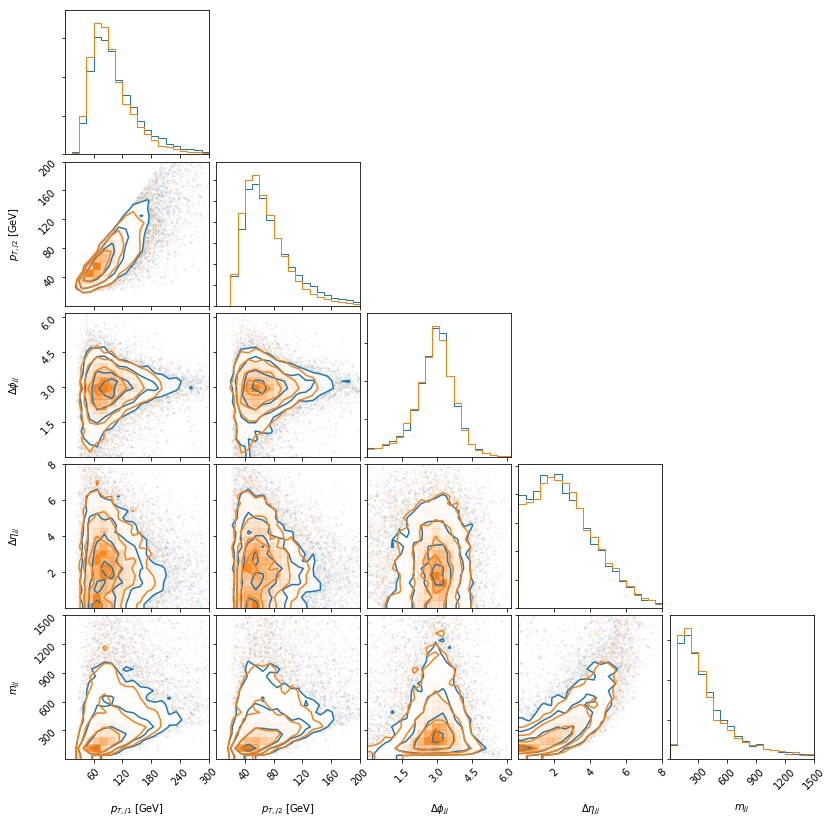

In [7]:
import corner

labels = [r'$p_{T,j1}$ [GeV]', r'$p_{T,j2}$ [GeV]', r'$\Delta \phi_{jj}$', r'$\Delta \eta_{jj}$', r'$m_{jj}$']
ranges = [(0., 300.), (0., 200.), (0.,6.2), (0.,8.), (0.,1500.)]

fig = corner.corner(x, color='C0', labels=labels, range=ranges)
_ = corner.corner(x_bsm, color='C1', labels=labels, range=ranges, fig=fig)

## Debug Forge

In [ ]:
forge = Forge(debug=True)

forge.train(
    method='rascal2',
    theta0_filename='data/samples/theta0_train_multiple_rascals.npy',
    theta1_filename='data/samples/theta1_train_multiple_rascals.npy',
    x_filename='data/samples/x_train_multiple_rascals.npy',
    y_filename='data/samples/y_train_multiple_rascals.npy',
    r_xz_filename='data/samples/r_xz_train_multiple_rascals.npy',
    t_xz0_filename='data/samples/t_xz0_train_multiple_rascals.npy',
    t_xz1_filename='data/samples/t_xz1_train_multiple_rascals.npy',
    alpha=100.,
    n_epochs=10,
    validation_split=0.3
)

forge.save('models/rascal2')

19:50  
19:50  ------------------------------------------------------------
19:50  |                                                          |
19:50  |  Forge                                                   |
19:50  |                                                          |
19:50  |  Version from July 31, 2018                              |
19:50  |                                                          |
19:50  |           Johann Brehmer, Kyle Cranmer, and Felix Kling  |
19:50  |                                                          |
19:50  ------------------------------------------------------------
19:50  
19:50  Starting training
19:50    Method:                 rascal2
19:50    Training data: theta0 at data/samples/theta0_train_multiple_rascals.npy
19:50                   theta1 at data/samples/theta1_train_multiple_rascals.npy
19:50                   x at data/samples/x_train_multiple_rascals.npy
19:50                   y at data/samples/y_train_multiple_rascals.npy
19

In [ ]:
theta_each = np.linspace(-100.,100.,21)
theta0, theta1 = np.meshgrid(theta_each, theta_each)
theta_grid = np.vstack((theta0.flatten(), theta1.flatten())).T
np.save('data/theta_grid.npy', theta_grid)

theta_denom = np.array([[0.,0.]])
np.save('data/theta_ref.npy', theta_denom)


In [ ]:
forge.load('models/rascal2')

log_r_hat, t_hat0, t_hat1 = forge.evaluate(
    theta0_filename='data/theta_grid.npy',
    theta1_filename='data/theta_ref.npy',
    x_filename='data/samples/x_test.npy',
)

In [ ]:
expected_llr = np.mean(log_r_hat, axis=1)

fig = plt.figure(figsize=(5,5))

plt.scatter(theta_grid[:,0], theta_grid[:,1], c=-2.*expected_llr,
            s=150., cmap='viridis_r',
            marker='s')

plt.tight_layout()
plt.show()

print('Best fit:', theta_grid[np.argmin(-2.*expected_llr)])